# **Task 04: Predicting House Prices using Regression Models**
**Author:** Touseef Asif  
**Objective:** To predict house prices using the `kc_house_data.csv` dataset and evaluate the model using RMSE and other metrics.

## **Step 1: Import Necessary Libraries**

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set default figure size for visualizations
plt.rcParams["figure.figsize"] = [10, 5]

## **Step 2: Load the Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('kc_house_data.csv')

# Display the first 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Step 3: Explore the Dataset**
### **3.1: Basic Information**

In [3]:
# Shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for missing values
print(data.isnull().sum())

# Get basic information about the dataset
data.info()

# Display basic statistics
data.describe()

Dataset contains 21613 rows and 21 columns.
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  flo

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **3.2: Visualizing Missing Values**

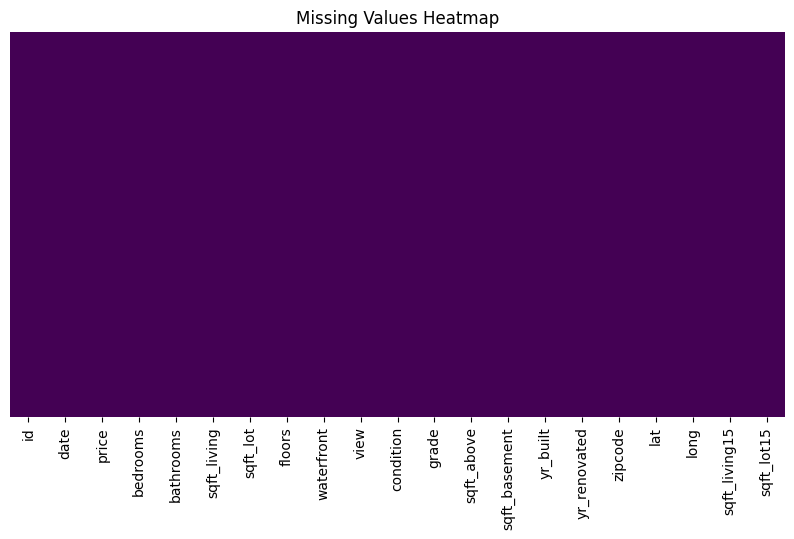

In [4]:
# Heatmap for missing values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## **Step 4: Drop Irrelevant Columns**

In [5]:
# Drop irrelevant columns (e.g., 'id' and 'date')
data = data.drop(['id', 'date'], axis=1)

# Verify the remaining columns
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Step 5: Visualize the Data**
### **5.1: Correlation Matrix**

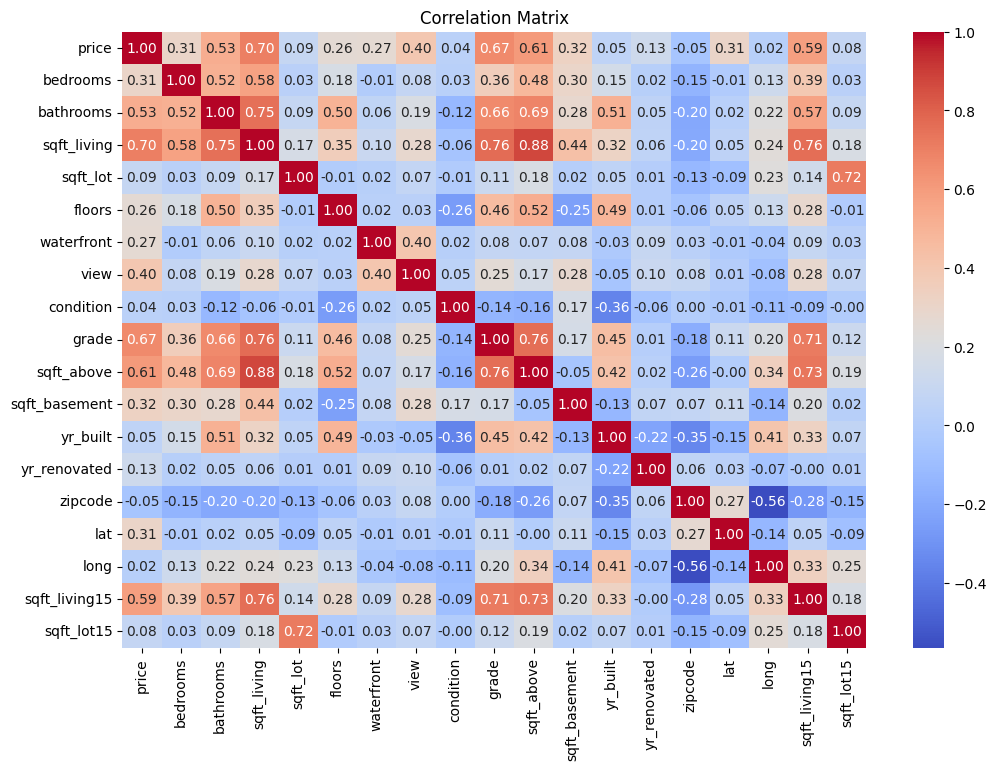

In [6]:
# Visualize correlation between features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## **Drop Low Importance Features**

In [7]:
#  Drop Low Importance Features
data.drop(['zipcode', 'long', 'condition', 'sqft_lot15','sqft_lot'], axis=1, inplace=True)

## **Feature Engineering**

In [8]:
# Step 2: Feature Engineering
data['total_sqft'] = data['sqft_living'] + data['sqft_basement']
data['age'] = 2023 - data['yr_built']
data['renovation_status'] = (data['yr_renovated'] > 0).astype(int)

## **Check Correlations Again**

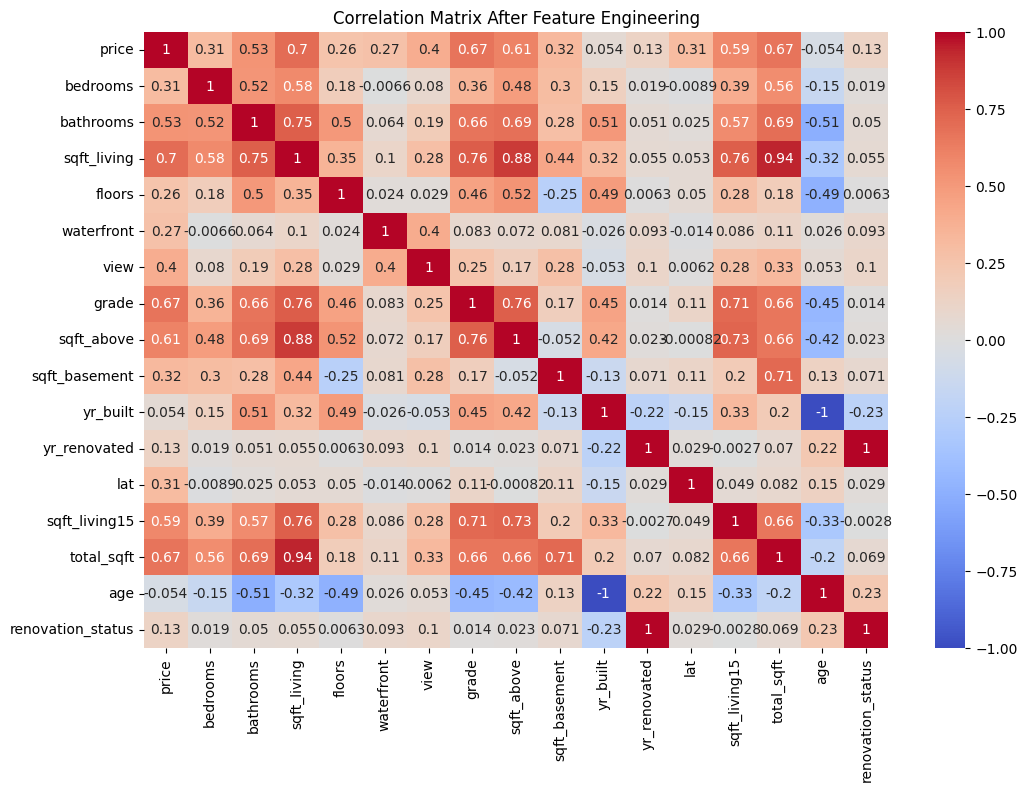

In [9]:
# Step 3: Check Correlations Again
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix After Feature Engineering")
plt.show()

## **5.2: Distribution of Target Variable (Price)**

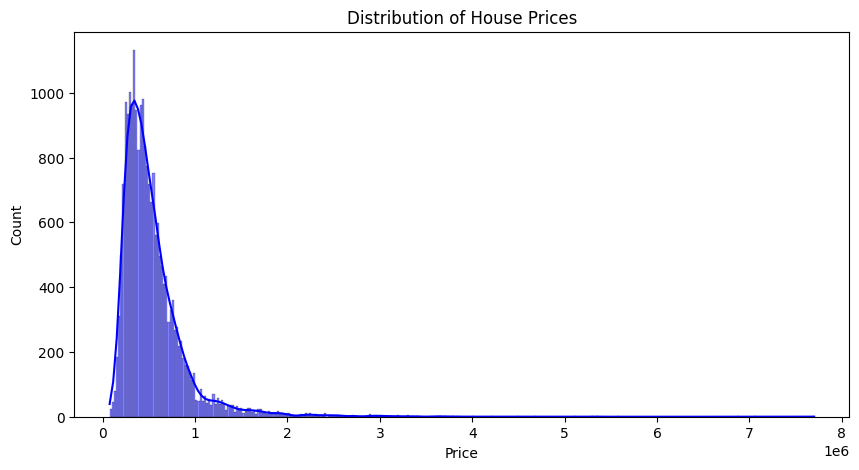

In [10]:
sns.histplot(data['price'], kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()

## **5.3: Feature Distributions**

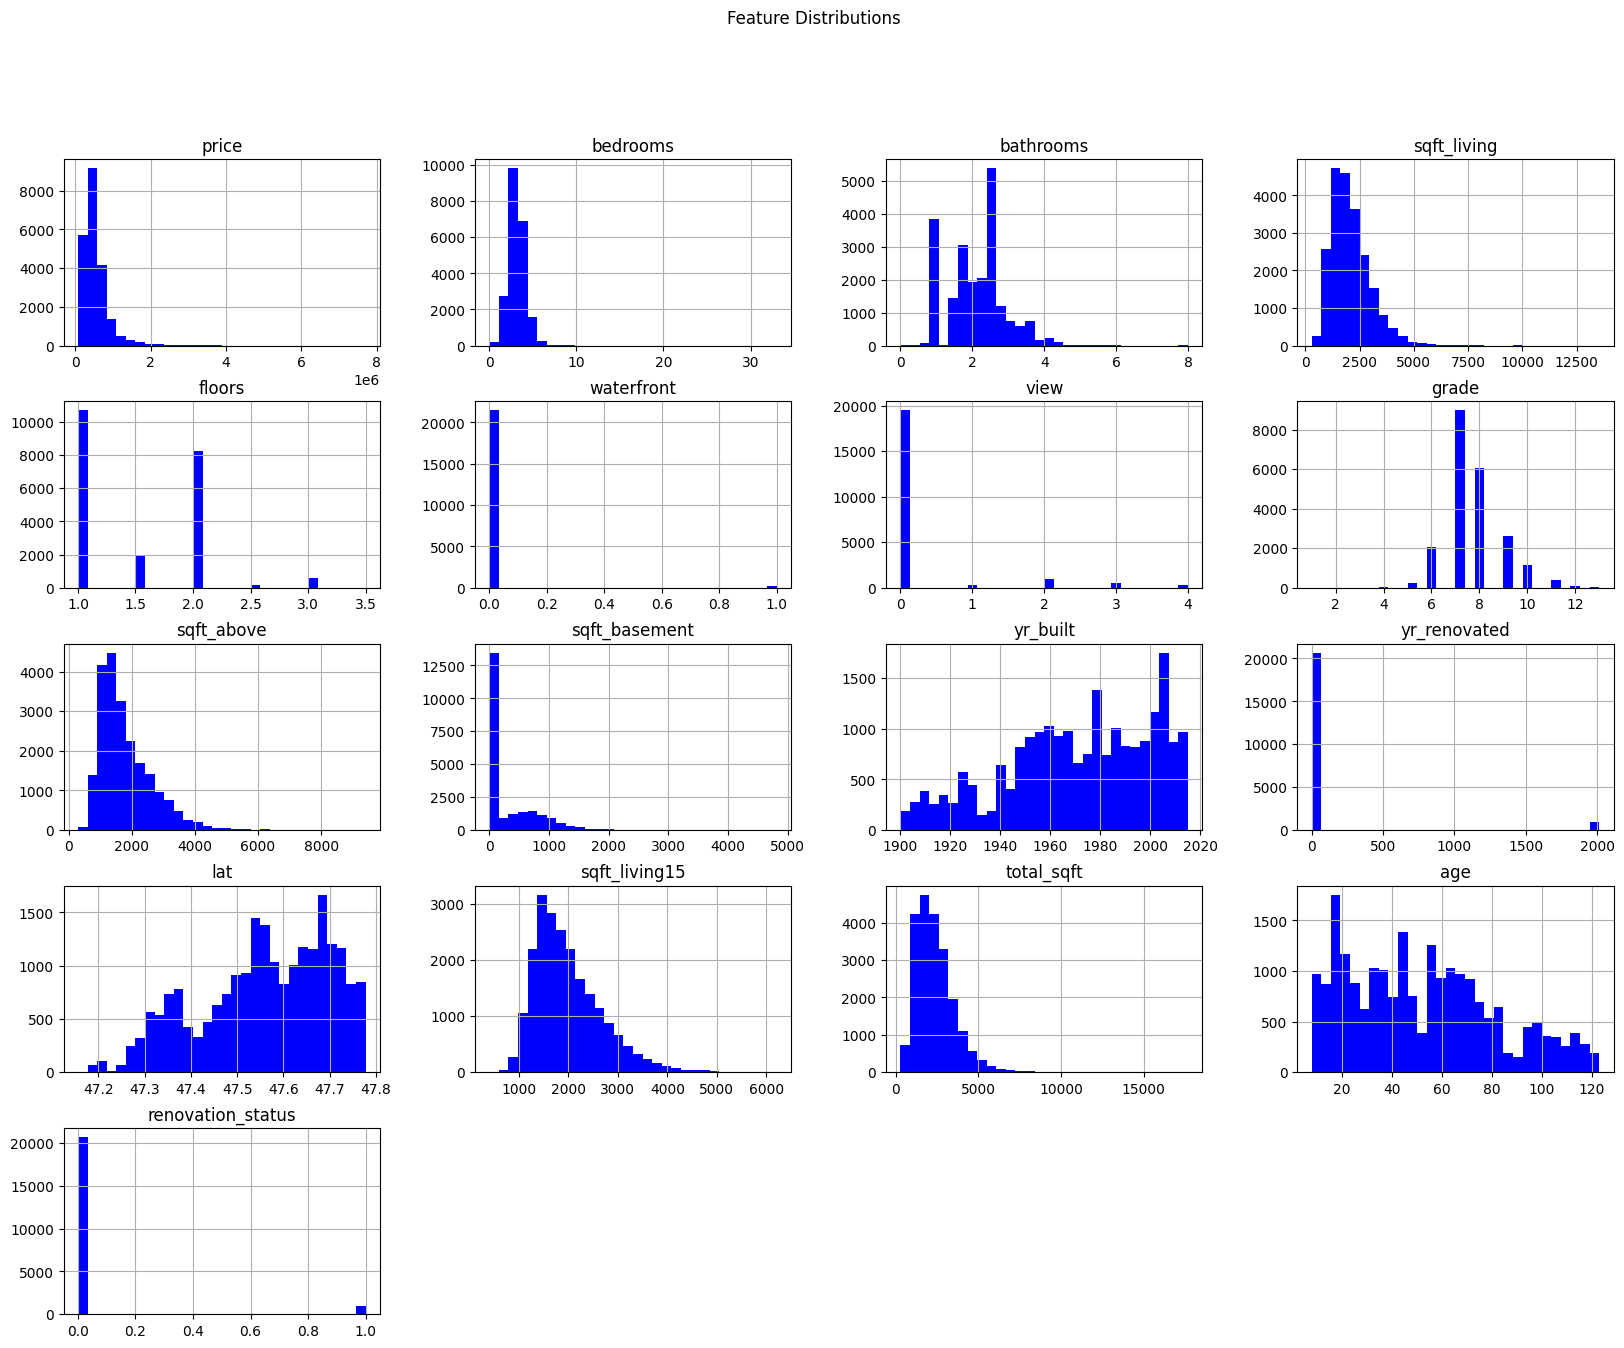

In [11]:
data.hist(bins=30, figsize=(20, 15), color='blue')
plt.suptitle("Feature Distributions")
plt.show()

## **Step 6: Prepare the Data**
### **6.1: Define Features and Target**

In [12]:
# Features (X) and Target (y)
X = data.drop('price', axis=1)
y = data['price']

## **6.2: Normalize the Features**

In [13]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **6.3: Train-Test Split**

In [14]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (17290, 16)
Testing Features Shape: (4323, 16)


## **Step 7: Train the Models**
### **7.1: Train a Linear Regression Model**

In [15]:
# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

## **7.2: Train a Decision Tree Regressor**

In [16]:
# Initialize Decision Tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

## **7.3: Train a Random Forest Regressor**

In [17]:
# Initialize Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

## **7.4: Train a Gradient Boosting Regressor**

In [18]:
# Initialize Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb.predict(X_test)

## **Step 8: Evaluate the Models**
### **8.1: Define Evaluation Metrics**

In [19]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-Squared (R2): {r2:.2f}")
    print("-" * 40)

## **8.2: Evaluate Each Model**

In [20]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")

Model: Linear Regression
Mean Absolute Error (MAE): 129340.73
Mean Squared Error (MSE): 46765590784.45
Root Mean Squared Error (RMSE): 216253.53
R-Squared (R2): 0.69
----------------------------------------
Model: Decision Tree Regressor
Mean Absolute Error (MAE): 119697.27
Mean Squared Error (MSE): 54008275196.92
Root Mean Squared Error (RMSE): 232396.81
R-Squared (R2): 0.64
----------------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 87496.71
Mean Squared Error (MSE): 32772157144.51
Root Mean Squared Error (RMSE): 181030.82
R-Squared (R2): 0.78
----------------------------------------
Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 93355.64
Mean Squared Error (MSE): 33125758706.00
Root Mean Squared Error (RMSE): 182004.83
R-Squared (R2): 0.78
----------------------------------------


## **Step 9: Compare Model Performance**

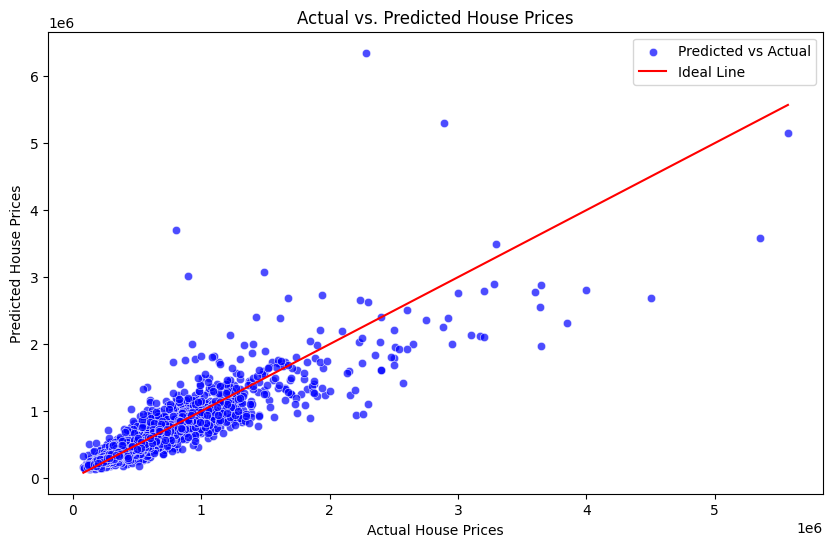

In [22]:
# Visualize Actual vs. Predicted House Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.legend()
plt.show()

In [23]:
# Combine Actual and Predicted Values in a DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(results_df.head())

          Actual   Predicted
735     365000.0   391241.50
2830    865000.0   707598.61
4106   1038000.0  1091705.40
16218  1490000.0  1563020.00
19964   711000.0   753992.00


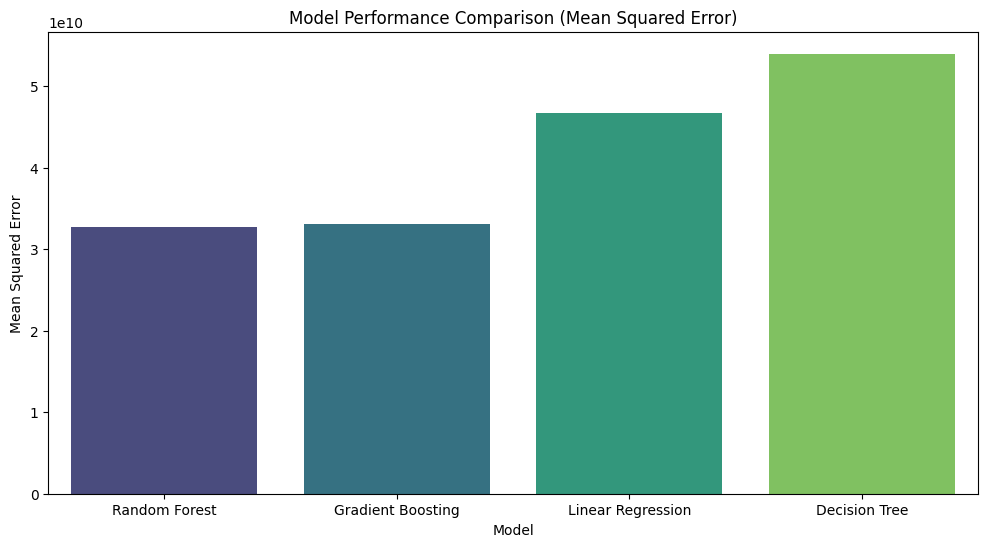

In [21]:
# Define model performance dictionary
model_scores = {
    "Linear Regression": mean_squared_error(y_test, y_pred_lr),
    "Decision Tree": mean_squared_error(y_test, y_pred_dt),
    "Random Forest": mean_squared_error(y_test, y_pred_rf),
    "Gradient Boosting": mean_squared_error(y_test, y_pred_gb),
}

# Sort scores by ascending order (lower is better)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Visualize model performance
model_names = [name for name, _ in sorted_scores]
model_mses = [score for _, score in sorted_scores]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=model_mses, palette="viridis")
plt.title("Model Performance Comparison (Mean Squared Error)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()